In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Loading datsets

In [54]:

df = pd.read_csv('mine.csv')
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [55]:
df2 =pd.read_csv('Work.csv')
df2


,Name,city,age,py-score
0,Emma,Kampala,23,90
1,Wilber,Mbale,26,75
2,Robin,Gulu,25,mine
3,Tevor,Livingstone,NaN,89
4,Yeko,Tororo,20,94
5,Miriam,Arua,Train,NaN
6,Jesca,Mbarara,21,84


Analyzing data

In [56]:
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [57]:
df.tail()

,Duration,Pulse,Maxpulse,Calories
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4
168,75,125,150,330.4


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB


In [ ]:
df2.head()

In [ ]:
df2.tail()

Cleaning data

In [59]:
# Identifying null values in mine.csv
df.isnull().sum().sort_values(ascending=False) 

Calories    5
Duration    0
Pulse       0
Maxpulse    0
dtype: int64

In [60]:
# Fillna() -Filling in the missing calories values in mine.csv

# To do this,I calculate the average value of calories, and fill in for the missing values

# calculate average
column_name = 'Calories'
average = df[column_name].mean()

# Filling in the missing values
df[column_name].fillna(average, inplace=True)# Inplace=True ensures that the changes are made directly to the dataframe

# checking if the values have been filled
df.isnull().sum().sort_values(ascending=False)


Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [63]:
# Identifying null values in df2 ie work.csv
df2.isnull().sum().sort_values(ascending=False) #Finding out the null values

age         1
py-score    1
Name        0
city        0
dtype: int64

In [64]:
# Dropna() -Dropping rows with missing values
df2.dropna()

,Name,city,age,py-score
0,Emma,Kampala,23,90
1,Wilber,Mbale,26,75
2,Robin,Gulu,25,mine
4,Yeko,Tororo,20,94
6,Jesca,Mbarara,21,84


In [65]:
#        -Dropping columns with missing values
df2.dropna(axis=1)

,Name,city
0,Emma,Kampala
1,Wilber,Mbale
2,Robin,Gulu
3,Tevor,Livingstone
4,Yeko,Tororo
5,Miriam,Arua
6,Jesca,Mbarara


Wrong data 

In [66]:
# removing values whose pulse rate was recorded for more than two minutes
condition = df['Duration'] > 180
df = df.drop(df[condition].index)

Wrong format

In [72]:
# Convert a column to the correct format for work.csv file
df2.loc[:,'age'] = pd.to_numeric(df2['age'], errors='coerce')#errors=coerce converts non correct format to NaN
df2.loc[:,'py-score'] = pd.to_numeric(df2['py-score'], errors='coerce')
# Remove rows with wrong formats
df2 = df2.dropna(subset=['py-score'])
df2


,Name,city,age,py-score
0,Emma,Kampala,23.0,90.0
1,Wilber,Mbale,26.0,75.0
3,Tevor,Livingstone,NaN,89.0
4,Yeko,Tororo,20.0,94.0
6,Jesca,Mbarara,21.0,84.0


Removing Duplicates

In [73]:
# Identify duplicate rows
duplicates = df.duplicated()

# Remove duplicate rows
df = df.drop_duplicates()

Correlation Anaysis

<Axes: >

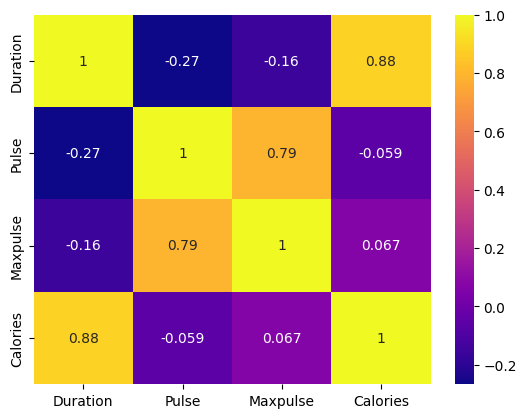

In [78]:
# Calculate correlation matrix of Work.csv file
correlation_matrix = df.corr()

# Visualize correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='plasma')